<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="680" height="140" align="right"/>


<center><h1> Machine Learning 203008067 </header1></center>
<left><h1> Componente práctico </header1></left>

Presentado por: Oscar Andrés Russi Porras  <br>
Fecha: 11/04/2024

## Importación de librerias necesarias

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import random

## Cargar el Dataset

In [123]:
#cargamos del archivo ubicado en la siguiente ubicacióm
url = 'https://drive.google.com/uc?id=1beJ6eB0-nj-ubDLJNTI71KhVNdsCJQpO'
df = pd.read_csv(url) # leer el csv
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.sample(5)

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
364,Quarter3,sweing,12,0.60,15.26,1245.0,6360,23,0.0,0,0,34.0,0.600173
1156,Quarter2,finishing,1,0.75,3.94,0.0,1920,0,0.0,0,0,8.0,0.812625
379,Quarter4,sweing,5,0.70,20.40,1480.0,10440,40,0.0,0,0,58.0,0.700251
83,Quarter1,finishing,4,0.80,3.94,0.0,4440,0,0.0,0,0,18.0,0.966781
1012,Quarter1,finishing,1,0.65,3.94,0.0,3360,0,0.0,0,0,8.0,0.537919


# Tranformación y limpieza de datos

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1176 non-null   object 
 1   department             1176 non-null   object 
 2   team                   1176 non-null   int64  
 3   targeted_productivity  1176 non-null   float64
 4   smv                    1176 non-null   float64
 5   wip                    1176 non-null   float64
 6   over_time              1176 non-null   int64  
 7   incentive              1176 non-null   int64  
 8   idle_time              1176 non-null   float64
 9   idle_men               1176 non-null   int64  
 10  no_of_style_change     1176 non-null   int64  
 11  no_of_workers          1176 non-null   float64
 12  actual_productivity    1176 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 119.6+ KB


In [125]:
# Contar los valores nulos en cada columna
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

quarter                  0
department               0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [128]:
# contar campos vacíos
campos_vacios = df.eq('').sum()
print(campos_vacios)

quarter                  0
department               0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [129]:
non_float_columns = list(df.select_dtypes(exclude=['float64']).columns)
non_float_columns # valores que no son float

['quarter',
 'department',
 'team',
 'over_time',
 'incentive',
 'idle_men',
 'no_of_style_change']

In [130]:
# miramos los valores distintos en cada columna que no sea float
for col in non_float_columns:
  uniques= [f"'{str(val)}'" for val in list(df[col].unique())]
  print(f"{col}: {','.join(uniques)}")

quarter: 'Quarter1','Quarter2','Quarter3','Quarter4','Quarter5'
department: 'sweing','finishing ','finishing'
team: '8','1','11','12','6','7','2','3','9','10','5','4'
over_time: '7080','960','3660','1920','6720','6900','6000','6480','2160','7200','1440','6600','5640','1560','6300','6540','13800','6975','7020','6780','4260','6660','4320','6960','2400','3840','4800','4440','1800','2700','10620','10350','9900','5310','10170','4470','10530','10440','5490','5670','9720','12600','10050','15120','14640','900','10260','2760','4710','9540','7680','3600','6420','7980','3240','8220','6930','8460','7350','5400','1620','1980','2970','7320','5100','3390','1260','3420','8970','4950','10080','9810','6570','5040','4380','3630','8280','6120','5580','3720','5760','7470','10500','6360','4140','8400','12180','9000','15000','10770','12000','9360','3060','2520','720','3780','10320','360','6840','1080','1200','4080','240','5880','6240','4200','3960','600','2280','1320','5460','2040','4020','3000','3360','5820

In [131]:
# Elimino el espacio adicional que tiene el campo "department" en algunos registros con valor "finishing"
df['department'].replace(to_replace='finishing ', value = 'finishing', inplace=True)
df['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [132]:
# función para codificar columnas
def generate_coded_column(column, df_):
  list_values = list(df_[column].unique())
  for i in range(len(list_values)):
    df_[column].replace(to_replace=list_values[i], value = i, inplace=True)
  return df_

df=generate_coded_column("department", df) # codificar department
df=generate_coded_column("quarter", df) # codificar quarter
df.sample(5)

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
825,2,1,7,0.70,5.13,0.0,960,0,0.0,0,0,8.0,0.671875
672,1,0,9,0.80,29.12,1073.0,6960,50,0.0,0,0,58.0,0.799963
421,3,0,4,0.75,22.52,867.0,10260,94,0.0,0,0,57.0,0.900321
591,0,0,10,0.80,22.52,1108.0,6720,113,0.0,0,0,56.0,0.999995
950,3,0,1,0.35,26.66,1164.0,6600,23,0.0,0,2,55.0,0.378895


# Acción 1: Aplicación modelos lineales.

In [133]:
df_modelo_lineal = df.copy()
df_modelo_lineal.sample(5)

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
791,2,1,7,0.7,4.15,0.0,1800,0,0.0,0,0,15.0,0.258000
95,0,0,12,0.8,11.61,1101.0,5310,50,0.0,0,0,31.5,0.800141
874,3,1,8,0.7,5.13,0.0,960,0,0.0,0,0,8.0,0.930417
159,1,0,12,0.8,11.61,893.0,4710,50,0.0,0,0,31.5,0.800346
817,2,0,5,0.8,30.10,511.0,0,0,0.0,0,0,59.0,0.800980


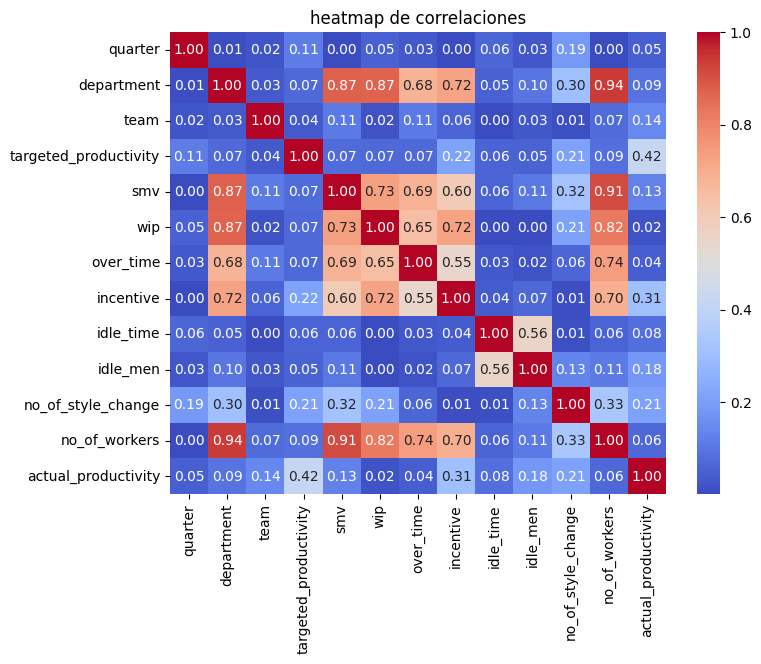

In [134]:
# mostrar correlaciones entre las variables numéricas
correlation_matrix = df_modelo_lineal.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix.abs(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('heatmap de correlaciones')
plt.show()

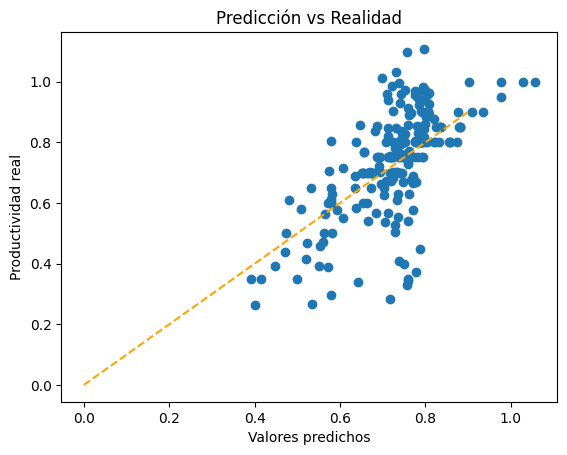

In [139]:
# función para dividir los datos para el training y el testing
def split_data(dependant, df_): # dividir en 20% datos para testing y 80% para training, semilla 42
  X = df_[[col for col in  df_.columns if col!=dependant]]  # variables independientes
  y = df_[dependant]  # Variable dependiente
  try:
        # Intenta dividir los datos con estratificación cuando sea posibe
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  except ValueError as e:
        # Si hay un error, probablemente debido a la estratificación, hacerlo sin estratificar
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data('actual_productivity',df_modelo_lineal)
# Paso 3: Aplicar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train )
# Paso 4: Realizar predicciones sobre el conjunto de prueba
y_predictions = modelo.predict(X_test)
# Paso 5: Visualizar los resultados con un diagrama de dispersión
plt.scatter(y_predictions, y_test)
plt.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1), color='orange', linestyle='--', label='y = x')
plt.xlabel('Valores predichos')
plt.ylabel('Productividad real')
plt.title('Predicción vs Realidad')
plt.show()

In [140]:
print(modelo.coef_) #  cambio en las variables dependientes por una unidad de cambio en la variable independiente
print(modelo.intercept_) # valor de la variable dependiente cuando todas las variables independientes son iguales a 0

[-1.88002192e-03  1.66121857e-01 -5.72351830e-03  4.54594670e-01
 -4.44955326e-03  1.27324716e-06 -3.96637909e-06  3.22931908e-03
  5.19789278e-04 -6.12906511e-03 -1.53689162e-03  2.63290090e-03]
0.28343990698217403


In [141]:
#  mostrar datos
def get_stats(val,val_predict):
  r2=r2_score(val,val_predict)
  mse=metrics.mean_squared_error(val,val_predict)
  rmse=np.sqrt(mse)
  mae=metrics.mean_absolute_error(val,val_predict)
  correlacion, _ = pearsonr(val_predict,val)
  print("R2  :", np.round(r2,3)) # R^2, 1 si predice perfectamente la variable independiente, 0 si no predice mejor que simplemente tomar la media de los datos
  print("MSE  :", np.round(mse,3)) # Cuanto más bajo es el MSE, mejor es el modelo en términos de precisión. Un MSE de 0 significa que el modelo predice los valores exactos sin error.
  print("RMSE :", np.round(rmse,3)) # raiz cuadrada de MSE
  print("MAE :",np.round(mae,3)) # Proporciona una idea de cuán grande es el error de las predicciones, sin considerar su dirección
  print("Correlación :",np.round(correlacion,3)) # Un valor de 1 significa una correlación positiva perfecta entre las predicciones y los valores reales (a medida que uno aumenta, el otro también). Un valor de -1 indica una correlación negativa perfecta (a medida que uno aumenta, el otro disminuye). Un valor cercano a 0 indica que no hay correlación lineal entre las predicciones y los valores reales.
get_stats(y_test, y_predictions)

R2  : 0.425
MSE  : 0.016
RMSE : 0.128
MAE : 0.09
Correlación : 0.657


# Acción 2: Aplicación modelo logístico.

In [158]:
df_modelo_logistico= df.copy()

def add_nivel_productividad(df_): # crear variable "nivel_productividad"
  # "bajo" si actual_productivity es menor o igual a 0.7, de lo contrario "alto"
  df_['nivel_productividad']= df_['actual_productivity'].apply(lambda val: 'bajo' if val<=0.7 else 'alto')
  df_=df_.drop('actual_productivity', axis=1) # eliminar "actual_productivity" después de crear nivel_productividad
  df_['nivel_productividad'].value_counts()
  return df_

df_modelo_logistico=add_nivel_productividad(df_modelo_logistico)
df_modelo_logistico['nivel_productividad'].value_counts()

nivel_productividad
alto    814
bajo    362
Name: count, dtype: int64

In [143]:
numeric_columns = list(df_modelo_logistico.select_dtypes(include=['float64']).columns)
numeric_columns

['targeted_productivity', 'smv', 'wip', 'idle_time', 'no_of_workers']

In [144]:
def binning(column_name, df_): # tomar las variable continuas y convertirlas en variables discretas usando 10 rangos
  min_val = df_[column_name].min()
  max_val = df_[column_name].max()
  range_size = max_val - min_val
  bins = [min_val + (i * range_size / 10) for i in range(11)] # usamos 10 rangos de igual tamaño
  labels = list(range(10))
  df_[column_name] = pd.cut(df_[column_name], bins=bins, labels=labels, include_lowest=True)

#  Aplicamos el binning a cada variable continua
for numeric in numeric_columns:
   binning(numeric, df_modelo_logistico)

df_modelo_logistico.sample(5)

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,nivel_productividad
788,2,0,11,8,1,2,2160,30,0,0,2,5,bajo
650,1,1,1,9,0,0,1200,0,0,0,0,0,alto
797,2,1,3,5,0,0,1800,0,0,0,0,1,alto
1005,0,0,8,9,5,2,6840,45,0,0,0,6,alto
1147,1,0,5,7,4,3,7080,26,0,0,1,6,bajo


In [146]:
df_modelo_logistico= generate_coded_column('nivel_productividad',df_modelo_logistico) # codificamos la variable "nivel_productividad"
df_modelo_logistico['nivel_productividad'].sample(10)

374     0
155     0
769     1
1100    0
175     0
200     0
984     1
1028    1
174     0
1084    0
Name: nivel_productividad, dtype: int64

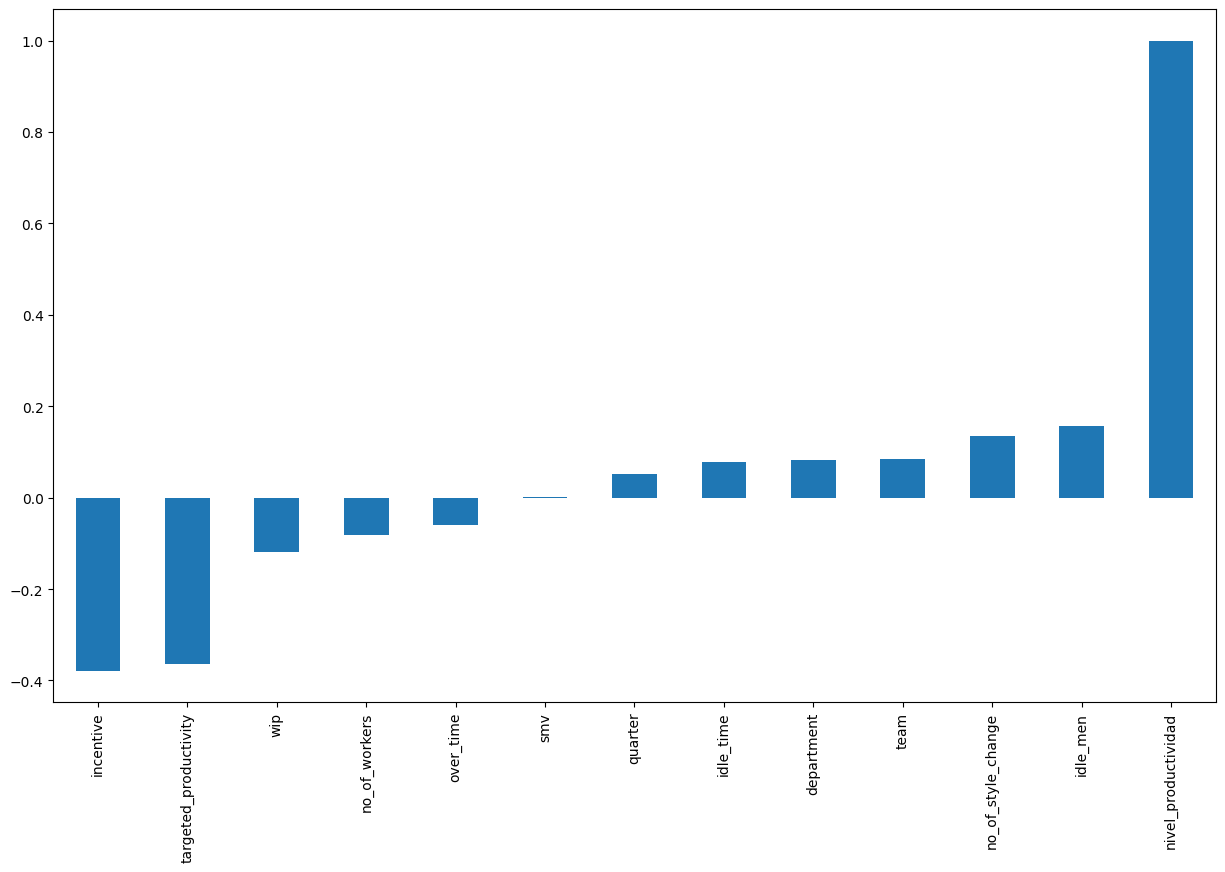

In [147]:
fig = plt.figure(figsize=(15,9))
df_modelo_logistico.corr()['nivel_productividad'].sort_values(ascending=True).plot(kind='bar')
plt.show() # mostrar en orden las variables más correlacionadas con nivel de productividad

In [148]:
# escalamos todas las variables
def generate_df_scaled(df_):
  # Vamos a escalar los datos
  scaler = MinMaxScaler()
  data_processing_scaled =  scaler.fit_transform(df_)
  # Se guardan los datos escalados como DF
  df_data_processing_scaled = pd.DataFrame(data_processing_scaled)
  # Se importan los nombres de las columnas
  df_data_processing_scaled.columns = df_.columns
  return df_data_processing_scaled

df_modelo_logistico=generate_df_scaled(df_modelo_logistico)
df_modelo_logistico.sample(5)

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,nivel_productividad
486,0.75,1.0,1.000000,1.000000,0.000000,0.000000,0.071429,0.000000,0.0,0.0,0.0,0.000000,0.0
233,0.25,0.0,0.909091,0.888889,0.444444,0.111111,0.630952,0.310924,0.0,0.0,0.0,0.555556,1.0
855,0.75,1.0,0.090909,1.000000,0.000000,0.000000,0.317460,0.000000,0.0,0.0,0.0,0.222222,0.0
273,0.50,1.0,0.636364,1.000000,0.000000,0.000000,0.095238,0.000000,0.0,0.0,0.0,0.000000,1.0
403,0.75,0.0,0.454545,1.000000,0.111111,0.333333,0.373016,0.529412,0.0,0.0,0.0,0.333333,0.0


In [149]:
X_train, X_test, y_train, y_test = split_data("nivel_productividad",df_modelo_logistico)
model = LogisticRegression()
result = model.fit(X_train, y_train)  # aplicamos la regresión logística sobre los datos de entrenamiento
prediction_test = model.predict(X_test) # obtenemos las predicciones usando el modelo entrenado en el paso anterior
print("La medida de precisión del modelo es:", metrics.accuracy_score(y_test,prediction_test ))

La medida de precisión del modelo es: 0.7796610169491526


Axes(0.125,0.11;0.775x0.77)


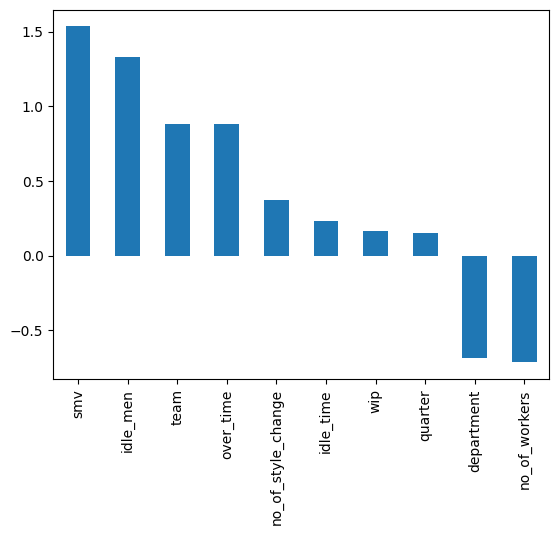

In [150]:
# Pesos de los atributos en el modelo
weights = pd.Series(model.coef_[0],
                    index=X_train.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

<Figure size 1100x1100 with 0 Axes>

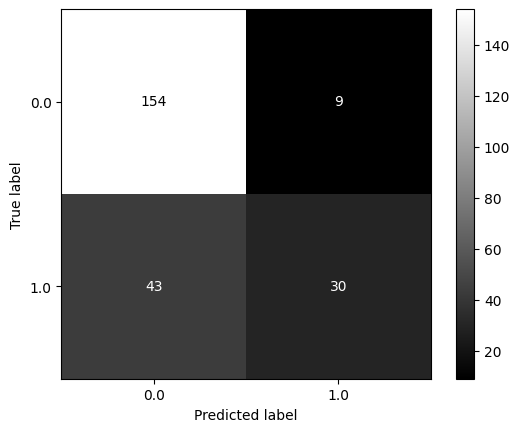

In [151]:
# matriz de confusión, muestras las concidencias y discrepancias entre las prediccioens y los valores reales
def generate_confusion_matrix(y_test_, prediction_test_):
  fig = plt.figure(figsize=(11,11))
  cm = confusion_matrix(y_test_, prediction_test_, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
  disp.plot(cmap='gray')
  plt.show()

generate_confusion_matrix(y_test, prediction_test)

In [152]:
# métricas en general
print("Accuracy: ", accuracy_score(y_test,prediction_test))
print("\nClassification Report:\n", classification_report(y_test,prediction_test))

Accuracy:  0.7796610169491526

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.94      0.86       163
         1.0       0.77      0.41      0.54        73

    accuracy                           0.78       236
   macro avg       0.78      0.68      0.70       236
weighted avg       0.78      0.78      0.76       236



# Acción 3: Aplicación K-NN.

In [153]:
df_knn = df.copy()
df_knn=df_knn[["no_of_workers","over_time","actual_productivity"]] # creamos un dataframe solo con las variables requeridas
df_knn.sample(5)

,no_of_workers,over_time,actual_productivity
510,10.0,1200,0.773333
870,8.0,960,0.385792
1126,56.0,6720,0.650421
869,58.0,6960,0.393549
415,17.0,3060,0.973797


In [154]:
df_knn=add_nivel_productividad(df_knn) # agregamos nivel_productividad
df_knn=generate_coded_column("nivel_productividad", df_knn) # codificamos nivel_productividad
df_knn.sample(5)

,no_of_workers,over_time,nivel_productividad
247,31.5,2970,0
437,21.0,3780,0
1042,56.0,0,0
1026,57.0,6840,0
916,59.0,4080,0


In [155]:
X_train, X_test, y_train, y_test = split_data('nivel_productividad', df_knn)
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train) # escalar las variables independientes
X_test = scaler.transform(X_test)

class Knn_data: # clase para guardar valores asociados al modelo knn
  def __init__(self,accuracy, knn, y_pred):
    self.accuracy = accuracy
    self.knn = knn
    self.y_pred = y_pred

# función para usar el algoritmo knn usando el número de vecinos que se le pasn como parámetro
def knn_generate(neighbors, X_train_, X_test_, y_train_, y_test_):
  knn = KNeighborsClassifier(n_neighbors=neighbors)
  knn.fit(X_train_, y_train_)
  y_pred = knn.predict(X_test_)
  accuracy = accuracy_score(y_test_, y_pred)
  return Knn_data(accuracy, knn, y_pred)

knn_final= Knn_data(0,None,None)
for i in range(1,21): # probar con números de vecinos desde 1 hasta 20
  knn_temp = knn_generate(i, X_train, X_test, y_train, y_test)
  if(knn_temp.accuracy>knn_final.accuracy): # si el accuracy con el número actual de vecinos ofrece un modelo mejor lo guardamos en knn_final
    knn_final = knn_temp
print(f" accuracy is: {knn_final.accuracy}")

 accuracy is: 0.7161016949152542


In [157]:
report = classification_report(y_test, knn_final.y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
# el output de classification_report muestra lo siguiente:
# la precisión con muestra el modelo es más preciso asignando la etiqueta 0 (bajo) que la etiqueta 1 (alto)
# el recall muestra que el modelo el modelo es mucho mejor para identificar la etiqueta 0 (0.88) que la etiqueta 1 (0.34)
# la f1 nos indica que para la etiqueta 0 hay un buen equilibrio entre la precisión y el recall, en cambio en la etiqueta 1 el valor indica que el equilibrio entre precisión y recall no es bueno
# el support refleja que los datos hay 163 con etiqueta 0 y 73 con etiqueta 1, esto refleja que la muestra mantuvo la propoción entre 0's y 1's del conjunto original (aproximadamente 2.23 con 814 con valor 'bajo' y 368 de valor 'alto'), esto gracias a usar el stratify

              precision    recall  f1-score     support
0              0.750000  0.883436  0.811268  163.000000
1              0.568182  0.342466  0.427350   73.000000
accuracy       0.716102  0.716102  0.716102    0.716102
macro avg      0.659091  0.612951  0.619309  236.000000
weighted avg   0.693760  0.716102  0.692514  236.000000


<Figure size 1100x1100 with 0 Axes>

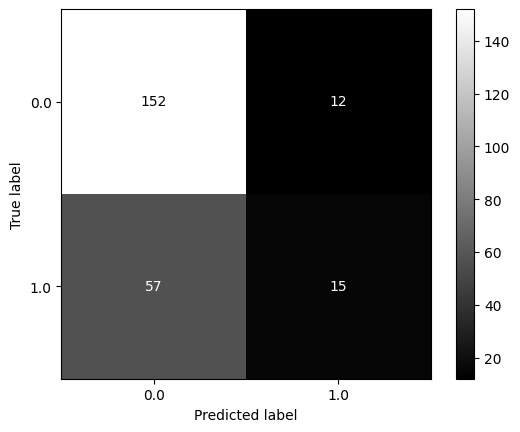

In [119]:
generate_confusion_matrix(y_test, knn_final.y_pred)